In [1]:
import cv2 
from matplotlib import pyplot as plt
import serial
import time
import numpy as np
import os

In [2]:
cap = cv2.VideoCapture(0)
ser = serial.Serial(port='COM4', baudrate=9600, timeout=0)

cap.set(cv2.CAP_PROP_EXPOSURE, -4)
n = 0
path = "C:/Users/brend/Pictures/Captured 8mm 2.0"
aligning = True
while aligning:
    ret, frame = cap.read()
    flipped = cv2.flip(frame.copy(), 0)
    cv2.rectangle(flipped, (20, 20), (40, 40), (255,0,0), 2)
    cv2.imshow('Aligning', flipped)
    # Period to microadjust
    key = cv2.waitKey(0) & 0xFF
    if key == ord('q'):
        cv2.destroyAllWindows()
        break
    # Enter when you're done
    elif key == ord('.'):
        ser.write(b'.\n')
        
while cap.isOpened():
    ret, frame = cap.read()
    flipped = cv2.flip(frame.copy(), 0)
    crop_img = flipped[20:40, 20:40]
    gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    cv2.imshow('Thresh', thresh)
    grayArray = np.asarray(thresh)
    avg = np.sum(grayArray) / (grayArray.shape[0] * grayArray.shape[1])
    cv2.rectangle(flipped, (20, 20), (40, 40), (255,0,0), 2)
    cv2.imshow('Main', flipped)
    if avg <= 242:
        time.sleep(0.2)
        ret, frame = cap.read()
        flipped = cv2.flip(frame.copy(), 0)
        cv2.rectangle(flipped, (20, 0), (20, 5), (255,0,0), 2)
        cv2.imshow('Main', flipped)
        cv2.imwrite(os.path.join(path, 'photo{}.png'.format(str(n))), cv2.flip(frame, 0))
        n += 1
        ser.write(b'+\n')
        time.sleep(0.3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
    ser.write(b'.\n')
    time.sleep(0.03)

cap.release()
cv2.destroyAllWindows()


SerialException: could not open port 'COM4': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [62]:
#OLD CORNERDETECTION

cap = cv2.VideoCapture(0)
ser = serial.Serial(port='COM4', baudrate=9600, timeout=0)

cap.set(cv2.CAP_PROP_EXPOSURE, -4)
n = 0

aligning = True
while aligning:
    ret, frame = cap.read()
    flipped = cv2.flip(frame.copy(), 0)
    cv2.rectangle(flipped, (1110, 20), (1160, 70), (255,0,0), 2)
    cv2.imshow('Aligning', flipped)
    # Period to microadjust
    key = cv2.waitKey(0) & 0xFF
    if key == ord('q'):
        break
    # Enter when you're done
    elif key == ord('.'):
        ser.write(b'.\n')

image_n = 0
steps = 0
path = "C:/Users/brend/Pictures/Captured 8mm 1.0"
while cap.isOpened():
    ret, frame = cap.read()
    flipped = cv2.flip(frame.copy(), 0)
    crop_img = flipped[20:70, 1110:1160]
    gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    # flipped2 = cv2.flip(frame.copy(), 0)
    # avg_crop = flipped2[20:1000, 1110:1160]
    # avg_gray = cv2.cvtColor(avg_crop, cv2.COLOR_BGR2GRAY)
    # avgNumpy = np.asarray(avg_gray)
    # avg = np.sum(avgNumpy) / (avgNumpy.shape[0] * avgNumpy.shape[1])
    thresh = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY)[1]
    numpyThresh = np.asarray(thresh)
    upper_right = 0
    lower_left = 0
    n = 0
    for row in numpyThresh:
        for i, pix in enumerate(row): 
            if i <= n:
                upper_right += pix/255
            else: 
                lower_left += pix/255
        n += 1
    diff = upper_right - lower_left
    print(diff)
    cv2.rectangle(flipped, (1110, 20), (1160, 70), (255,0,0), 2)
    cv2.imshow('Main', flipped)
    cv2.imshow('Thresh', thresh)
    cv2.imwrite(os.path.join(path, 'photo{}.png'.format(str(image_n))), cv2.flip(frame, 0))
    if diff >= 790:
        time.sleep(0.2)
        ret, frame = cap.read()
        flipped = cv2.flip(frame.copy(), 0)
        if steps < 25:
            cv2.rectangle(flipped, (1110, 20), (1160, 70), (255,0,0), 2)
            image_n += 1
        ser.write(b'+\n')
        time.sleep(0.3)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    
    ser.write(b'.\n')
    steps += 1
    time.sleep(0.03)

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [66]:
import matplotlib.pyplot as plt

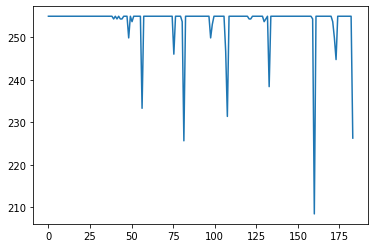

In [88]:
# x = np.linspace(0, len(avgs), len(avgs))
# plt.plot(x, avgs)
# plt.show()